In this notebook, we show how does the diemsnionality reduction technique **PCA** work.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA

In [2]:
plt.rcParams['figure.figsize'] = (8,8)

In [3]:
n_points = 2000

In [4]:
xs = (np.random.random(n_points) - 0.5) * 2
ys = (np.random.random(n_points) - 0.5) * 2
zs = ys

mask = [xs ** 2 + 4 * ys**2 <= 1]

xs = xs[mask]
ys = ys[mask]
zs = zs[mask]
c = xs ** 2 + 4 * ys**2

data = np.array([xs,ys,zs]).transpose()
data.shape

(776, 3)

### We have some points in the 3D space.

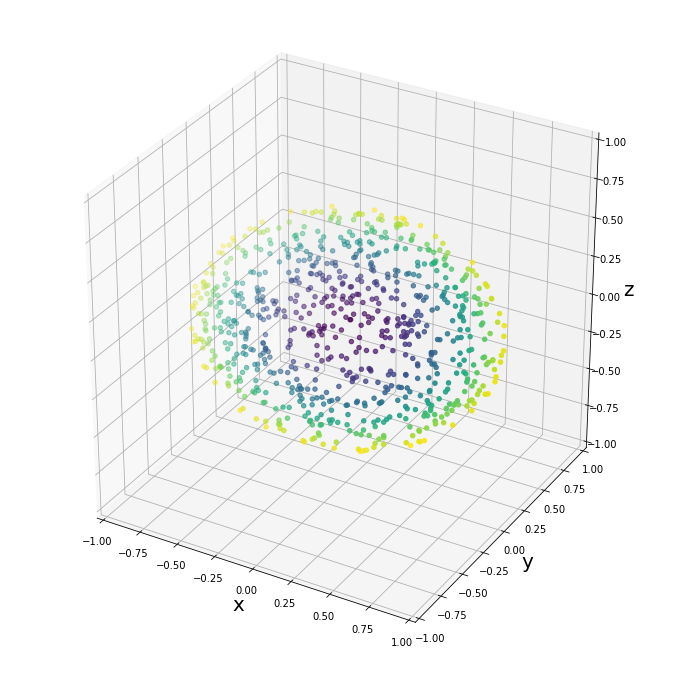

In [5]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=c, marker='o')
X_plot = np.linspace(-1, 1, 100)
ax.set_aspect('equal')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
plt.show()

### Now we perform PCA to reduce the space into two dimensions

In [6]:
n_components = 2

pca = PCA(n_components)
data_tr = pca.fit_transform(data)

### We can visualize the points in the **new** 2D space.

Text(0,0.5,'y_new')

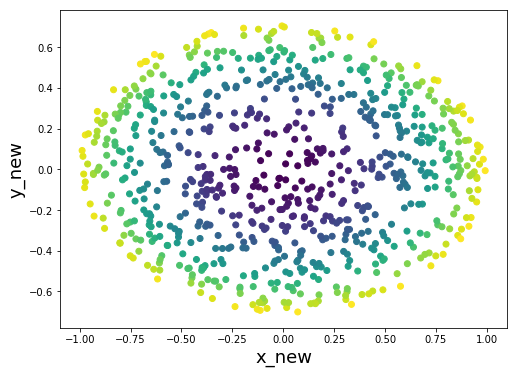

In [7]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(data_tr[:,0], data_tr[:,1], c=c, marker='o')
plt.xlabel('x_new', fontsize=18)
plt.ylabel('y_new', fontsize=18)

**PCA captured 100 % of the original variance so we can safely work further with 2 dimensions without losing any infofmation.**

In [8]:
print(pca.explained_variance_ratio_)
print(f'PCA captured {np.round(pca.explained_variance_ratio_.sum(), 2)} of variance.')

[0.68039922 0.31960078]
PCA captured 1.0 of variance.


In [9]:
pca.components_.round(3)

array([[-1.   , -0.018, -0.018],
       [ 0.026, -0.707, -0.707]])

The new space has 2 axis `x_new` and `y_new` created as:

    x_new =      x - 0.005y - 0.005z
    y_new = 0.007x - 0.707y - 0.707z

